# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [2]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#loading data
df = pd.read_csv('/Users/kali/Documents/GitHub/Machine_Learning_DataScience/adult.data')

In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(32560, 15)

In [6]:
#checking data to see what i'm working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#finding the count for each value
df.value_counts()

#cleaning data by dropping duplicate rows and columns
df.drop_duplicates(inplace=True)


In [8]:
#first attempt of trying to add column headers(cleaning data)
#ethnicity = ['White', 'white','Black','Black','White','Black','Black','White','White','White']
#df['Ethnicity'] = ethnicity

#the solution that actually worked to add column headers(cleaning data)
df.columns = ['age', 'workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
#checking to see if there are any null values(cleaning/data)
df1 = pd.isna(df).sum()
df1

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

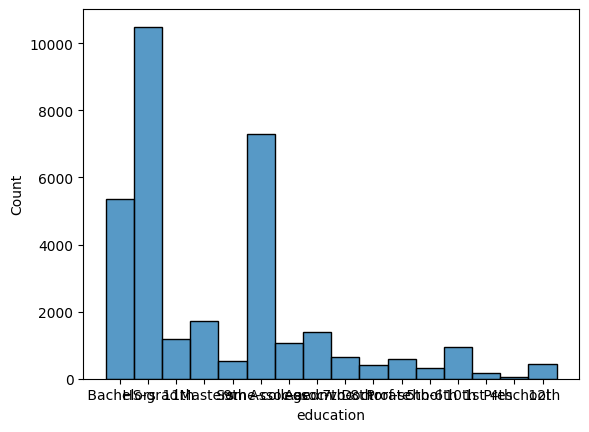

In [10]:
#plt.hist('Adult_Data', data=df); (use for regression models)
#gathering a summary statistic
sns.histplot(data=df, x='education');

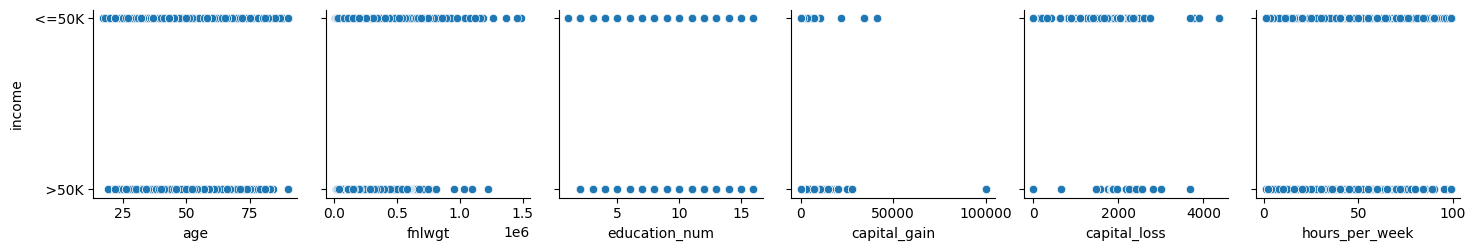

In [11]:
#how it looks in relation to the rset of my data
sns.pairplot(data=df, y_vars='income');  

In [12]:
#identify target vector
target = 'income'

#step 2: separate out the target vector
X = df.drop(columns = [target, 'education'])
y = df[target]

#step 3: split dataset
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

#Assert stsatement to make sure you arent going crazy
assert len(X_train) + len(X_test) == len(X), 'Data did not split correctly'

In [13]:
#establishing baseline
base = (df.income.value_counts(normalize=True)*100).round(2)[0] #indexing into the majority class wich is income less than 50k
#didn't need to set it to a value but did to put into an f string

#formating and predicting accuracy
print(f'Our baseline model can predict our majority class, .=50k for {base}% of the time!')

Our baseline model can predict our majority class, .=50k for 75.91% of the time!


/var/folders/9t/d7vqm7vd2dz91m11t5lqqbgw0000gn/T/ipykernel_68020/1833282556.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  base = (df.income.value_counts(normalize=True)*100).round(2)[0] #indexing into the majority class wich is income less than 50k


In [32]:
# Logistic Regression Pipeline: 
#lr_pipe is the object
lr_pipe = make_pipeline(
    OrdinalEncoder(), #index position 0, tuple (name of pipleline, object)
    LogisticRegression(random_state=42)
)

# Fit the pipeline
lr_pipe.fit(X_train, y_train) #x is 2d feature matrix, y is a 1d target vector

lr_pipe.steps[1][1].coef_    #gives me the steps of the pipleline

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/ut

array([[-7.20333448e-03, -4.41315101e-04, -3.60060829e-06,
        -1.71361510e-03, -1.44219391e-03, -2.22127834e-03,
        -9.81716315e-04, -5.47176431e-04, -3.42553733e-04,
         3.35259179e-04,  8.02174122e-04, -7.95305993e-03,
        -9.13513173e-04]])

In [37]:
#evaluate and check metrics by pulling out the score
print('Logistic Regression:')
print(f"Training Accuracy: {lr_pipe.score(X_train, y_train)*100}")
print(f"Testing Accuracy: {lr_pipe.score(X_test, y_test)*100}")


Logistic Regression:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/ut

Training Accuracy: 79.76410019978485
Testing Accuracy: 79.91702519975415


In [62]:
#roc_auc_score tells us how efficent a model is
print("Logistic Regression:")
print(f"Training ROC AUC Score: {round(roc_auc_score(y_train, lr_pipe.predict(X_train)),2)*100}")
print(f'Testing ROC AUC Score: {round(roc_auc_score(y_test, lr_pipe.predict(X_test)),2)*100}')

Logistic Regression:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/ut

ValueError: could not convert string to float: ' <=50K'

2

['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
[[-7.20333448e-03 -4.41315101e-04 -3.60060829e-06 -1.71361510e-03
  -1.44219391e-03 -2.22127834e-03 -9.81716315e-04 -5.47176431e-04
  -3.42553733e-04  3.35259179e-04  8.02174122e-04 -7.95305993e-03
  -9.13513173e-04]]


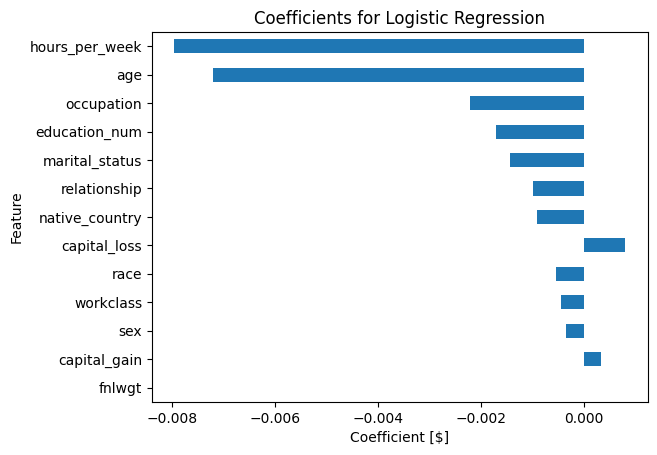

In [42]:
#communicating the results
# Create horizontal barchart 
coefficents = lr_pipe.named_steps['logisticregression'].coef_
features = lr_pipe.feature_names_in_
print(features)
print(coefficents)

# Coeff sliced for first value in array.
feat_imp = pd.Series(coefficents[0], index = features).sort_values(key=abs)
feat_imp.tail(20).plot(kind='barh')

plt.xlabel('Coefficient [$]')
plt.ylabel('Feature')
plt.title('Coefficients for Logistic Regression');

In [54]:
#tuning the model

param_grid = {
    'logisticregression__C': np.arange(0.1, 2.0, .2),
}
clf = RandomizedSearchCV(lr_pipe, param_grid)
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/util

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['workclass',
                                                                   'marital_status',
                                                                   'occupation',
                                                                   'relationship',
                                                                   'race',
                                                                   'sex',
                                                                   'native_country'],
                                                             mapping=[{'col': 'workclass',
                                                                       'data_type': dtype('O'),
                                                                       'mapping':  Private             1
 Self-emp-not-inc    2
 Local-gov           3
 State-gov           4
 Federal-gov         5
 ?                   6
 Self-emp-inc        7
 Without-pay         8
 Never-worked        9
NaN                 -2
dtype: int64},
                                                                      {'...
 Taiwan                        27
 Poland                        28
 Greece                        29
 Honduras                      30
 Hungary                       31
 Ecuador                       32
 South                         33
 Outlying-US(Guam-USVI-etc)    34
 Portugal                      35
 Hong                          36
 Laos                          37
 Thailand                      38
 Trinadad&Tobago               39
 Cambodia                      40
 Scotland                      41
 Holand-Netherlands            42
NaN                            -2
dtype: int64}])),
                                             ('logisticregression',
                                              LogisticRegression(random_state=42))]),
                   param_distributions={'logisticregression__C': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9])})

In [58]:
clf.best_estimator_



Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['workclass', 'marital_status',
                                      'occupation', 'relationship', 'race',
                                      'sex', 'native_country'],
                                mapping=[{'col': 'workclass',
                                          'data_type': dtype('O'),
                                          'mapping':  Private             1
 Self-emp-not-inc    2
 Local-gov           3
 State-gov           4
 Federal-gov         5
 ?                   6
 Self-emp-inc        7
 Without-pay         8
 Never-worked        9
NaN                 -2
dtype: int64},
                                         {'col': 'marital_status',
                                          'data_t...
 Columbia                      19
 Puerto-Rico                   20
 China                         21
 Peru                          22
 Dominican-Republic            23
 India                         24
 England                       25
 Germany                       26
 Taiwan                        27
 Poland                        28
 Greece                        29
 Honduras                      30
 Hungary                       31
 Ecuador                       32
 South                         33
 Outlying-US(Guam-USVI-etc)    34
 Portugal                      35
 Hong                          36
 Laos                          37
 Thailand                      38
 Trinadad&Tobago               39
 Cambodia                      40
 Scotland                      41
 Holand-Netherlands            42
NaN                            -2
dtype: int64}])),
                ('logisticregression',
                 LogisticRegression(C=0.5000000000000001, random_state=42))])

In [57]:
clf.best_score_

0.7989091283500196